In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('K01_heart_disease.csv')

Import library yang diperlukan untuk analisis data, visualisasi, dan machine learning.
pandas dan numpy untuk manipulasi data, seaborn dan matplotlib untuk visualisasi, 
serta modul sklearn untuk model klasifikasi dan evaluasi.

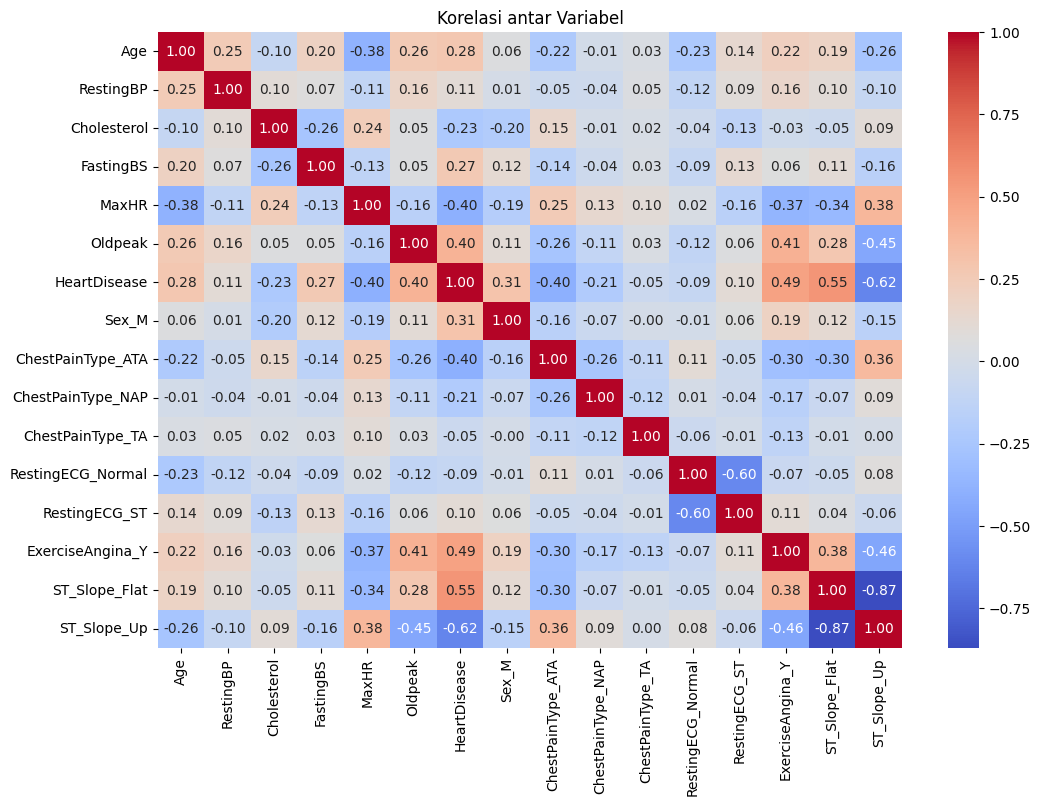

In [2]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Hitung korelasi
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.show()

Menghitung korelasi antar variabel untuk melihat hubungan antar fitur, 
lalu menampilkannya menggunakan heatmap untuk memvisualisasikan korelasi antar fitur dalam dataset.

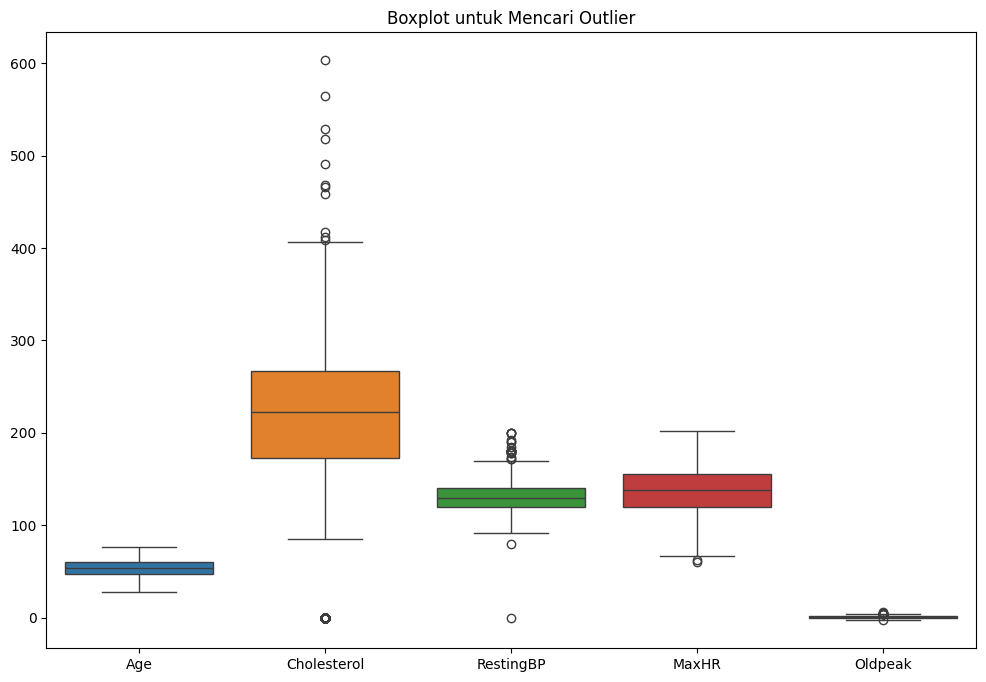

In [3]:
# Menggunakan boxplot untuk mencari outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_encoded[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']])
plt.title('Boxplot untuk Mencari Outlier')
plt.show()

Menampilkan boxplot untuk memeriksa distribusi dan mengidentifikasi outlier pada fitur numerik, seperti Age, Cholesterol, 
dan lainnya, untuk analisis lebih lanjut.

In [4]:
# Pisahkan fitur dan target
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Memisahkan data menjadi fitur (X) dan target (y) untuk digunakan dalam pelatihan model. 
Fitur terdiri dari variabel independen, sedangkan HeartDisease menjadi variabel target. 
Dan, melakukan standarisasi pada fitur agar memiliki skala yang seragam, sehingga meningkatkan performa model yang sensitif terhadap perbedaan skala.

In [5]:
# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Membagi data menjadi set pelatihan dan set pengujian dengan perbandingan 80:20 untuk melatih dan menguji model menggunakan data berbeda.

In [6]:
# Membuat dan melatih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[[62 15]
 [16 91]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.86      0.85      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



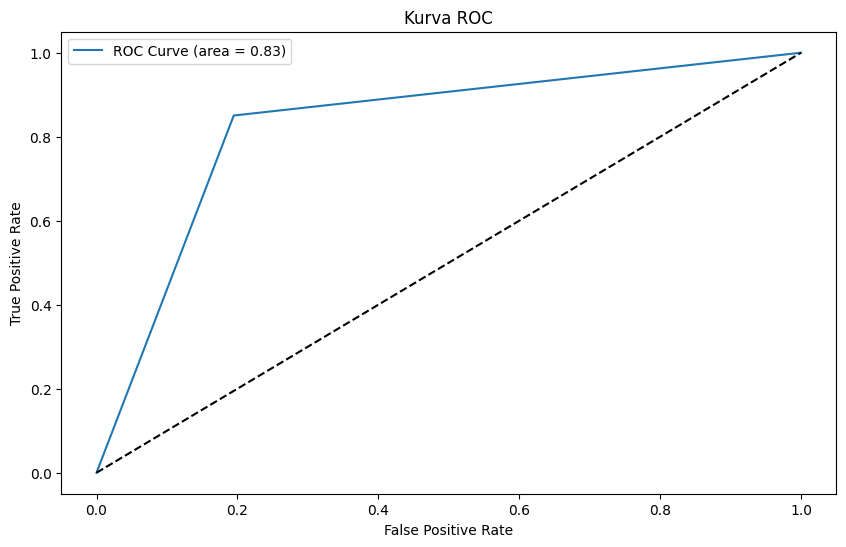

In [7]:
# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Menghitung ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend()
plt.show()

Menggunakan model Decision Tree yang telah dilatih untuk memprediksi variabel target (y) pada data uji (X_test), 
guna menilai performa model awal. Mengevaluasi performa model menggunakan confusion matrix dan classification 
report untuk mendapatkan metrik akurasi, presisi, recall, dan f1-score pada data uji.

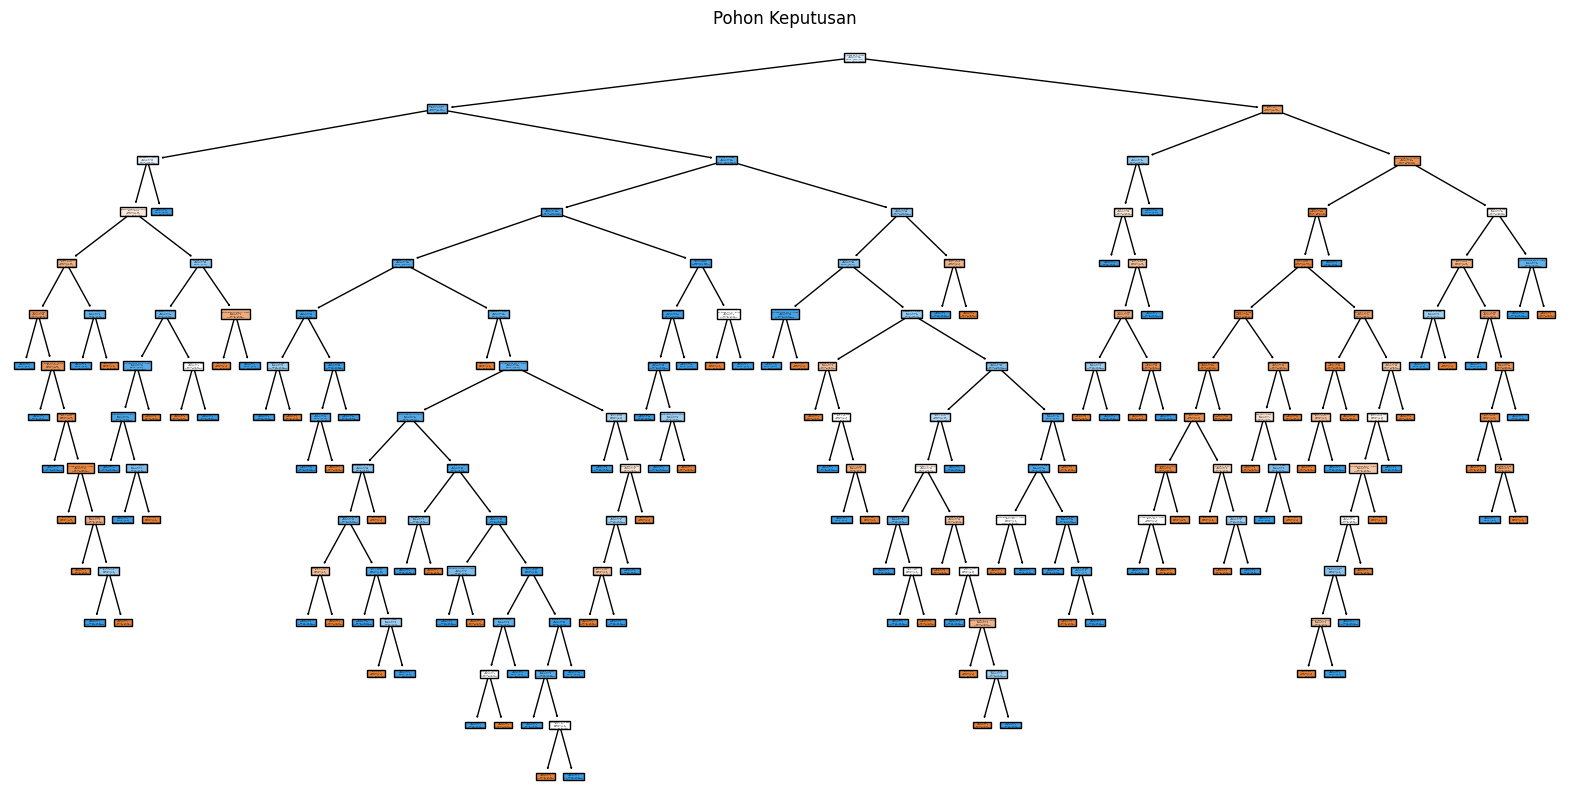

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Heart Disease'])
plt.title('Pohon Keputusan')
plt.show()

In [9]:
# Pruning model dengan mengatur max_depth
pruned_model = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_model.fit(X_train, y_train)

# Evaluasi model yang sudah dipangkas
y_pred_pruned = pruned_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))

[[64 13]
 [12 95]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Melakukan pruning pada Decision Tree dengan mengatur max_depth menjadi 5 untuk mengurangi kompleksitas model, 
menghindari overfitting, dan meningkatkan generalisasi model. Dan, Mengevaluasi performa model yang telah dipangkas 
menggunakan confusion matrix dan classification report untuk melihat efek pruning pada akurasi dan metrik lainnya.

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
[[66 11]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Melakukan tuning hyperparameter menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik 
(max_depth, min_samples_split, min_samples_leaf) berdasarkan hasil cross-validation. 
Dan, Mencetak parameter terbaik yang ditemukan oleh GridSearchCV, lalu menggunakan model terbaik tersebut (best_model) untuk melanjutkan evaluasi pada data uji.
Serta, mengevaluasi performa model terbaik pada data uji menggunakan confusion matrix dan classification report untuk mendapatkan metrik akurasi dan performa terbaik berdasarkan parameter optimal yang ditemukan.